In [2]:
import pandas as pd
import ast

In [7]:
df = pd.read_csv('pdfConvertwTopicsUNDERGRAD.csv', sep = '|')

In [8]:
df.head(10)

,Unnamed: 0.1,Unnamed: 0,0,1,courseNumbers,topics
0,0,0,"IS 100 A, ONL SP21 Exploring the iSchool (Torr...",exploring the ischool with a humancentered len...,100,"[(0, 0.017419554), (1, 0.90658754), (2, 0.0759..."
1,3,3,"IS 413 BO SP21 Teen Materials (Quealy, K).pdf",1 is 413ab sp1 teen materials spring 2021 mond...,413,"[(0, 0.4334025), (1, 0.03019826), (2, 0.5363992)]"
2,5,5,IS 458 AO FA19 Instruc Strat Tech Info Prof (W...,is458\tinstructional\tstrategies\tand\ttechniq...,458,"[(0, 0.08952905), (1, 0.90728205)]"
3,6,6,"IS 401 ACG, ACU FA22 Introduction to Networked...",1 introduction to networked information...,401,"[(0, 0.6108254), (1, 0.1912857), (2, 0.19788882)]"
4,7,7,GSD 102 AL FA22 Intro to the Videogame Industr...,gsd 102 introduction to the video game industr...,102,"[(2, 0.9987778)]"
5,8,8,IS 445 AO SP20 Info Books & Resources Youth (M...,is445 ao information books and resources for y...,445,"[(0, 0.1818683), (1, 0.79784626), (2, 0.020285..."
6,9,9,GSD 390 DBU FA22 Introduction to Unreal (Baird...,gsd 390 – introduction to unreal general inf...,390,"[(0, 0.779072), (1, 0.08906044), (2, 0.13186763)]"
7,10,10,IS 467 AOU SP21 Ethics & Policy for Data Scien...,syllabus for is 467 data ethics and policy 1 ...,467,"[(0, 0.99484944)]"
8,13,13,"IS 226 AO FA20 Introduction to HCI (Wang, Y).pdf",1 is226 introduction to humancomputer interact...,226,"[(0, 0.8287294), (1, 0.12854008), (2, 0.042730..."
9,17,17,"IS 419 AOG, AOU SP21 Entrepreneurial IT Design...",1 syllabus full course title entrepreneurial i...,419,"[(0, 0.34523186), (1, 0.016879313), (2, 0.6378..."


In [9]:
list(ast.literal_eval(df['topics'][1]))[0][1]

0.4334025

In [15]:
correctTopic = []
for i in df['topics']:
    tmp = list(ast.literal_eval(i))
    maxVal = 0
    cl = ''
    for j in tmp:
        if j[1] > maxVal:
            cl = j[0]
            maxVal = j[1]
    correctTopic.append(cl)

In [16]:
df['correctTopic'] = correctTopic

In [17]:
df.head()

,Unnamed: 0.1,Unnamed: 0,0,1,courseNumbers,topics,correctTopic
0,0,0,"IS 100 A, ONL SP21 Exploring the iSchool (Torr...",exploring the ischool with a humancentered len...,100,"[(0, 0.017419554), (1, 0.90658754), (2, 0.0759...",1
1,3,3,"IS 413 BO SP21 Teen Materials (Quealy, K).pdf",1 is 413ab sp1 teen materials spring 2021 mond...,413,"[(0, 0.4334025), (1, 0.03019826), (2, 0.5363992)]",2
2,5,5,IS 458 AO FA19 Instruc Strat Tech Info Prof (W...,is458\tinstructional\tstrategies\tand\ttechniq...,458,"[(0, 0.08952905), (1, 0.90728205)]",1
3,6,6,"IS 401 ACG, ACU FA22 Introduction to Networked...",1 introduction to networked information...,401,"[(0, 0.6108254), (1, 0.1912857), (2, 0.19788882)]",0
4,7,7,GSD 102 AL FA22 Intro to the Videogame Industr...,gsd 102 introduction to the video game industr...,102,"[(2, 0.9987778)]",2


In [18]:
df1 = df[df['correctTopic'] == 0]
df2 = df[df['correctTopic'] == 1]
df3 = df[df['correctTopic'] == 2]

In [19]:
print(len(df1))
print(len(df2))
print(len(df3))

143
57
56


In [47]:
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize as wt 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
#spell correction
#from autocorrect import spell
data = []
for i in range(df1.shape[0]):
    sms = df1.iloc[i, 3]
    # remove non alphabatic characters
    sms = re.sub('[^A-Za-z]', ' ', sms)
    # make words lowercase, because Go and go will be considered as two words
    sms = sms.lower()
    # tokenising
    tokenized_sms = wt(sms)
    # remove stop words and stemming
    sw = stopwords.words('english')
    sw.extend(['cid','student','cours','class','assign','inform','read','week','grade','univers','use','work','learn',
'instructor','due','academi','requir','may','illinoi','complet','pleas','materi','ischool','respons','meet','lectur','final',
'librari','academ','includ','resourc','contact','must'])
    sms_processed = []
    for word in tokenized_sms:
        if word not in set(sw):
            sms_processed.append((stemmer.stem(word)))
    sms_text = " ".join(sms_processed)
    data.append(sms_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fjsti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fjsti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


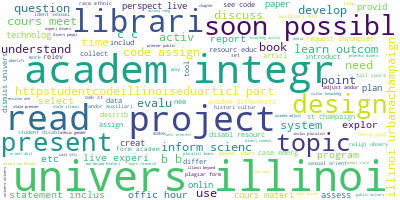

In [48]:
from wordcloud import WordCloud

long_string = ','.join(list(data))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [25]:
courseNumbers = []
firstval = []
for i in df['0']:
    if i[0] == 'I' and i[1] == 'S':
        courseNumbers.append(i[3:6])
    elif i[0] == 'G':
        courseNumbers.append(i[4:7])
    elif i[0] == 'I' and i[1] == 'N':
        courseNumbers.append(i[5:8])
    elif i[0] == 'W':
        courseNumbers.append(i[5:8])
    firstval.append(i[0])

In [23]:
#courseNumbers.append('0')

In [26]:
df['courseNumbers'] = courseNumbers

In [27]:
df.head()

,Unnamed: 0.1,Unnamed: 0,0,1,courseNumbers,topics,correctTopic
0,0,0,"IS 100 A, ONL SP21 Exploring the iSchool (Torr...",exploring the ischool with a humancentered len...,100,"[(0, 0.017419554), (1, 0.90658754), (2, 0.0759...",1
1,3,3,"IS 413 BO SP21 Teen Materials (Quealy, K).pdf",1 is 413ab sp1 teen materials spring 2021 mond...,413,"[(0, 0.4334025), (1, 0.03019826), (2, 0.5363992)]",2
2,5,5,IS 458 AO FA19 Instruc Strat Tech Info Prof (W...,is458\tinstructional\tstrategies\tand\ttechniq...,458,"[(0, 0.08952905), (1, 0.90728205)]",1
3,6,6,"IS 401 ACG, ACU FA22 Introduction to Networked...",1 introduction to networked information...,401,"[(0, 0.6108254), (1, 0.1912857), (2, 0.19788882)]",0
4,7,7,GSD 102 AL FA22 Intro to the Videogame Industr...,gsd 102 introduction to the video game industr...,102,"[(2, 0.9987778)]",2


In [28]:
df1 = df[df['correctTopic'] == 0]
df2 = df[df['correctTopic'] == 1]
df3 = df[df['correctTopic'] == 2]

In [29]:
import matplotlib.pyplot as plt
import math

In [98]:
#def roundDown(x):
#    return int(math.floor(x / 100.0)) * 100

In [30]:
courses1 = df1['courseNumbers'].to_numpy()
courses2 = df2['courseNumbers'].to_numpy()
courses3 = df3['courseNumbers'].to_numpy()

In [42]:
for i in range(len(courses3)):
    courses3[i] = int(courses3[i])

In [33]:
import numpy as np

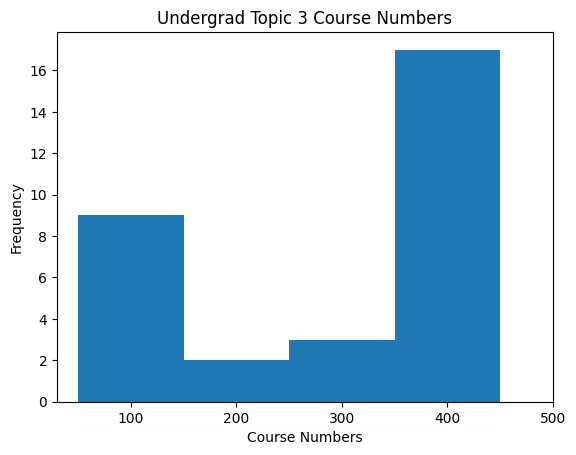

In [43]:

plt.hist(courses3, bins = range(100,600,100), align = 'left')
plt.xticks(range(100,600,100))
plt.title('Undergrad Topic 3 Course Numbers')
plt.ylabel('Frequency')
plt.xlabel('Course Numbers')
plt.show()